# Introduction to Data Science 2025

# Week 3

## Exercise 1 | Working with geospatial data (GIS)

To get at least a bit familiar with [GIS](https://en.wikipedia.org/wiki/Geographic_information_system) data and the concept of map projections, we’ll do a simple task of plotting two data sets that are given in different coordinate systems.

1. Download the [world_m.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/world_m.zip) and [cities.zip](https://github.com/HY-TKTL/intro-to-data-science-2017/blob/master/cities.zip) files that each include a set of GIS files. Most notably, the <span style="font-weight: bold">shp</span> files are [Shapefile-files](https://en.wikipedia.org/wiki/Shapefile) with coordinates (don’t look, it’s binary!). The <span style="font-weight: bold">prj</span> files contain information (in plain text, so okay to look) about the coordinate systems. Open the files using your favorite programming environment and packages.  

    <span style="font-weight: 500"> *Hint: We warmly recommend [Geopandas](http://geopandas.org/) for pythonistas.*</span>

In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Use this cell for your code
import geopandas
world = geopandas.read_file("world_d/world_m.shp")
world

,pop_est,continent,name,iso_a3,gdp_md_est,gdp_per_ca,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,0.000784,"POLYGON ((6813956.99 4227673.562, 6927484.435 ..."
1,12799293.0,Africa,Angola,AGO,110300.0,0.008618,"MULTIPOLYGON (((1817460.823 -651055.118, 18449..."
2,3639453.0,Europe,Albania,ALB,21810.0,0.005993,"POLYGON ((2292095.859 5110825.73, 2277950.23 5..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,0.038408,"POLYGON ((5741805.754 2765811.385, 5761611.935..."
4,40913584.0,South America,Argentina,ARG,573900.0,0.014027,"MULTIPOLYGON (((-7291426.647 -7365665.131, -73..."
...,...,...,...,...,...,...,...
169,218519.0,Oceania,Vanuatu,VUT,988.5,0.004524,"MULTIPOLYGON (((18684406.211 -1846685.56, 1864..."
170,23822783.0,Asia,Yemen,YEM,55280.0,0.002320,"POLYGON ((5912019.261 1868005.938, 5831494.449..."
171,49052489.0,Africa,South Africa,ZAF,491000.0,0.010010,"POLYGON ((3508901.827 -3387567.669, 3487145.51..."
172,11862740.0,Africa,Zambia,ZMB,17500.0,0.001475,"POLYGON ((3646756.993 -1025170.115, 3699301.18..."


2. The <span style="font-weight: bold">world_m</span> file contains borders of almost all countries in the world. Plot the world.

In [3]:
# Use this cell for your code
world["area"] = world.area
world[["area","name"]]

,area,name
0,9.458513e+11,Afghanistan
1,1.307538e+12,Angola
2,5.222347e+10,Albania
3,9.561656e+10,United Arab Emirates
4,4.309344e+12,Argentina
...,...,...
169,8.068921e+09,Vanuatu
170,4.929132e+11,Yemen
171,1.591429e+12,South Africa
172,7.955112e+11,Zambia


<Axes: >

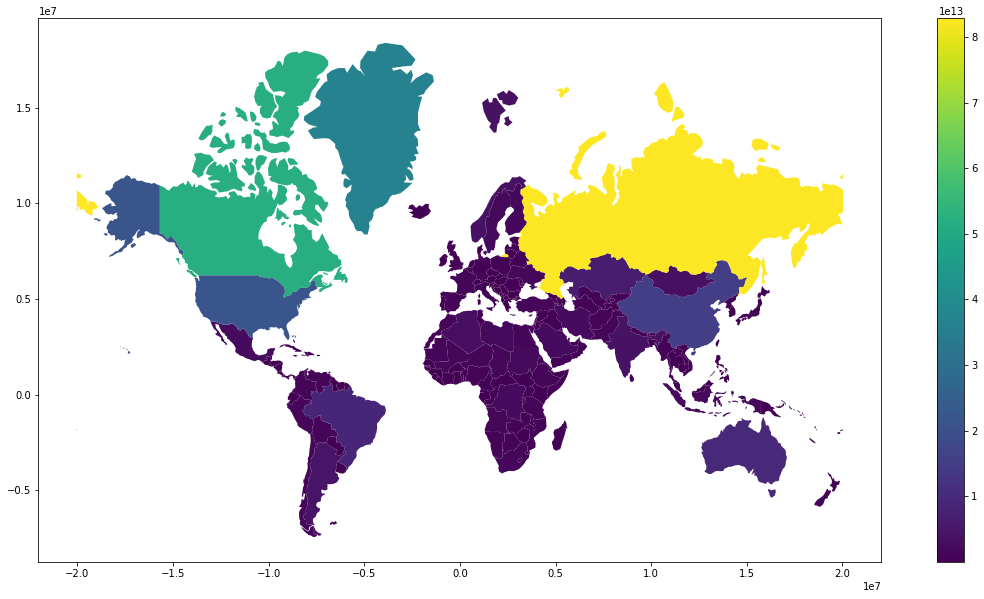

In [4]:
world.plot("area",legend=True,figsize=(20,10))

3. On top of the countries that you just plotted, plot another layer of information, namely the capital cities of each country from the <span style="font-weight: bold">cities</span> dataset. However, depending on how clever your programming environment is, the cities will probably all appear to be in the Gulf of Guinea, near the coordinates (0°, 0°).

In [5]:
cities = geopandas.read_file("cities_d/cities.shp")
cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.9361)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


<Axes: >

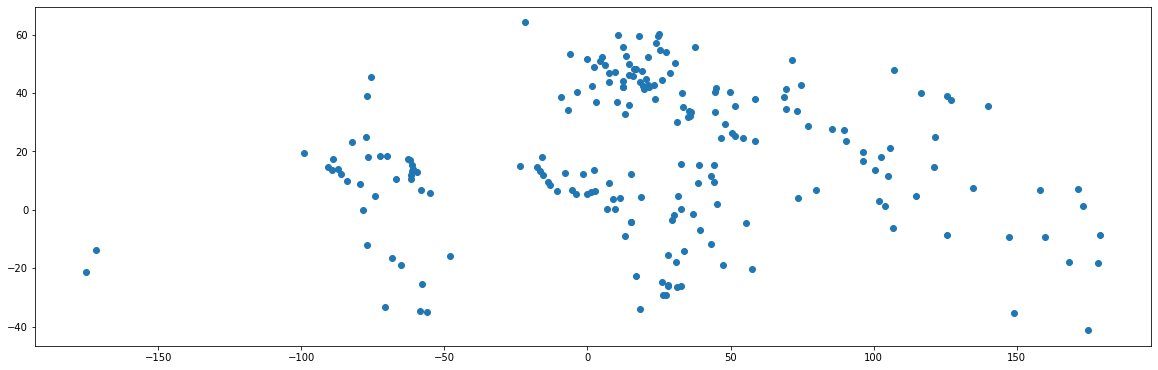

In [6]:
cities["geometry"].plot(figsize=(20,10))

<Axes: >

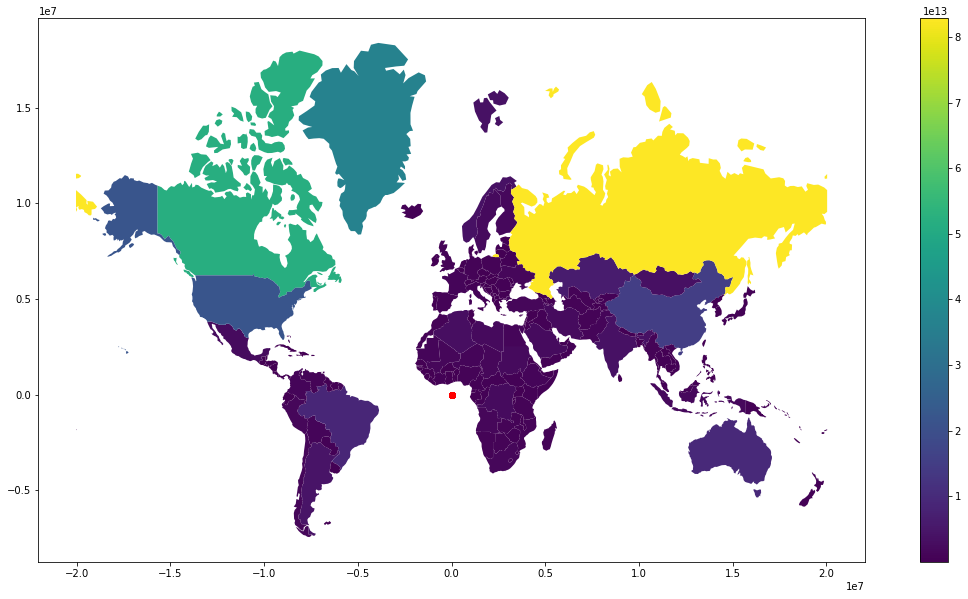

In [7]:
# Use this cell for your code
ax=world.plot("area",legend=True,figsize=(20,10))
cities["geometry"].plot(ax=ax,color="red")

4. Perform a map projection to bring the two data-sets into a shared coordinate system. (You can choose which one.) Now plot the two layers together to make sure the capital cities are where they are supposed to be.

In [8]:
print("World CRS:", world.crs)
print("Cities CRS:", cities.crs)

World CRS: EPSG:3395
Cities CRS: EPSG:4326


In [9]:
cities_projected = cities.to_crs(world.crs)
print("Cities CRS:", cities_projected.crs)

Cities CRS: EPSG:3395


<Axes: >

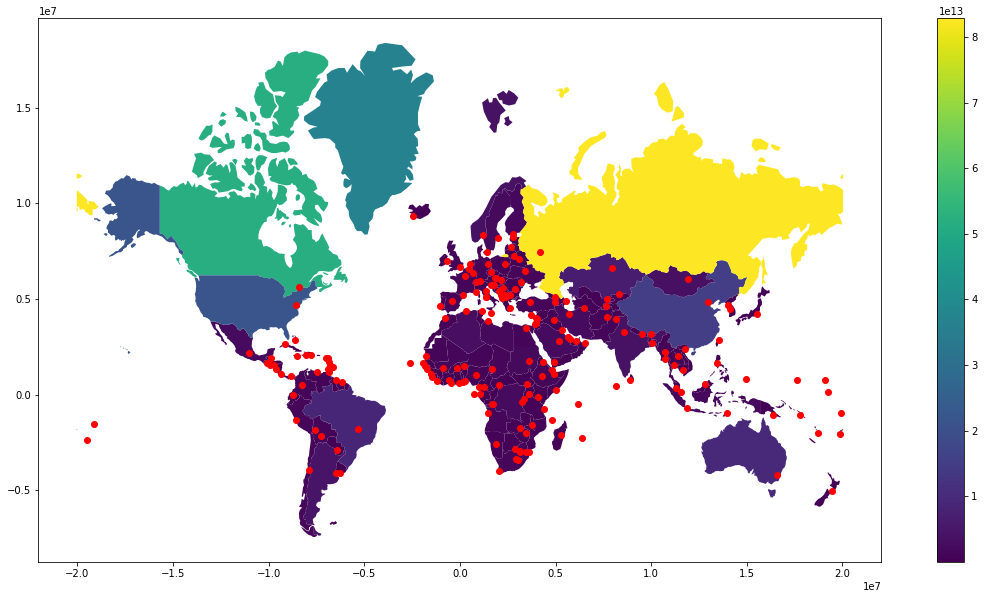

In [10]:
# Use this cell for your code
# Use this cell for your code
ax=world.plot("area",legend=True,figsize=(20,10))
cities_projected["geometry"].plot(ax=ax,color="red")

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Symbol classification

We’ll be looking into machine learning by checking out the [HASYv2](https://zenodo.org/record/259444#.Wb7efZ8xDhZ) dataset that contains hand written mathematical symbols as images. The whole dataset is quite big, so we’ll restrict ourselves to doing 10-class classification on some of the symbols. Download the data and complete the following tasks.

In [30]:
import tarfile

# Path to your downloaded file
file_path = "HASYv2.tar.bz2"

# Extract files
with tarfile.open(file_path, "r:bz2") as tar:
    tar.extractall(path="HASYv2") 

In [31]:
import os

# Path to the extracted HASYv2 folder
hasy_path = "HASYv2"  # Change this if your path is different

# Walk through the folder
for root, dirs, files in os.walk(hasy_path):
    # Print the current folder path
    print(f"\nFolder: {root}")
    
    # List subfolders
    if dirs:
        print(" Subfolders:")
        for d in dirs:
            print(f"  - {d}")
    
    # List files
    if files:
        print(" Files:")
        for f in files[:10]:  # Only show first 10 files in each folder
            print(f"  - {f}")
        if len(files) > 10:
            print(f"  ... and {len(files)-10} more files")



Folder: HASYv2
 Subfolders:
  - classification-task
  - hasy-data
  - verification-task
 Files:
  - hasy-data-labels.csv
  - hasy_tools.py
  - README.txt
  - symbols.csv

Folder: HASYv2\classification-task
 Subfolders:
  - fold-1
  - fold-10
  - fold-2
  - fold-3
  - fold-4
  - fold-5
  - fold-6
  - fold-7
  - fold-8
  - fold-9

Folder: HASYv2\classification-task\fold-1
 Files:
  - test.csv
  - train.csv

Folder: HASYv2\classification-task\fold-10
 Files:
  - test.csv
  - train.csv

Folder: HASYv2\classification-task\fold-2
 Files:
  - test.csv
  - train.csv

Folder: HASYv2\classification-task\fold-3
 Files:
  - test.csv
  - train.csv

Folder: HASYv2\classification-task\fold-4
 Files:
  - test.csv
  - train.csv

Folder: HASYv2\classification-task\fold-5
 Files:
  - test.csv
  - train.csv

Folder: HASYv2\classification-task\fold-6
 Files:
  - test.csv
  - train.csv

Folder: HASYv2\classification-task\fold-7
 Files:
  - test.csv
  - train.csv

Folder: HASYv2\classification-task\fold-8
 

1. Extract the data and find inside a file called <span style="font-weight: bold">hasy-data-labels.csv</span>. This file contains the labels for each of the images in the <span style="font-weight: bold">hasy_data</span> folder. Read the labels in and only keep the rows where the <span style="font-weight: bold">symbol_id</span> is within the inclusive range <span style="font-weight: bold">[70, 79]</span>. Read the corresponding images as black-and-white images and flatten them so that each image is a single vector of shape <span style="font-weight: bold">32x32 = 1024</span>. Your dataset should now consist of your input data of shape <span style="font-weight: bold">(1020, 1024)</span> and your labels of shape <span style="font-weight: bold">(1020, )</span>. That is, a matrix of shape <span style="font-weight: bold">1020 x 1024</span> and a vector of size <span style="font-weight: bold">1020</span>.

In [51]:
# import pandas as pd
# import numpy as np
# from PIL import Image
# import os

# # Path to CSV
# csv_path = "HASYv2/classification-task/fold-1/train.csv"

# # Folder containing the CSV
# csv_folder = os.path.dirname(csv_path)

# # Step 1: Read CSV
# data = pd.read_csv(csv_path)

# # Step 2: Filter for symbol_id in [70, 79]
# subset = data[(data['symbol_id'] >= 70) & (data['symbol_id'] <= 79)].reset_index(drop=True)
# print("Number of filtered rows:", len(subset))

# # Step 3: Load images
# X = []
# y = []

# for _, row in subset.iterrows():
#     # Resolve relative paths relative to the CSV file
#     img_path = os.path.normpath(os.path.join(csv_folder, row['path']))
    
#     if os.path.exists(img_path):
#         img = Image.open(img_path).convert('L')
#         img_array = np.array(img).flatten()
#         X.append(img_array)
#         y.append(row['symbol_id'])
#     else:
#         print("File not found:", img_path)

# # Step 4: Convert to numpy arrays
# X = np.array(X)
# y = np.array(y)

# print("Input data shape:", X.shape)
# print("Labels shape:", y.shape)


Number of filtered rows: 914
Input data shape: (914, 1024)
Labels shape: (914,)


In [56]:
import pandas as pd
import numpy as np
from PIL import Image
import os

# Folds to include
folds = range(1, 11)  # fold-1 to fold-10
root_folder = "HASYv2"
X_list = []
y_list = []

for fold in folds:
    csv_path = f"{root_folder}/classification-task/fold-{fold}/train.csv"
    csv_folder = os.path.dirname(csv_path)
    
    data = pd.read_csv(csv_path)
    subset = data[(data['symbol_id'] >= 70) & (data['symbol_id'] <= 79)].reset_index(drop=True)
    
    for _, row in subset.iterrows():
        img_path = os.path.normpath(os.path.join(csv_folder, row['path']))
        if os.path.exists(img_path):
            img = Image.open(img_path).convert('L')
            img_array = np.array(img).flatten()
            X_list.append(img_array)
            y_list.append(row['symbol_id'])

# Combine all folds
X_all = np.array(X_list)
y_all = np.array(y_list)

print("Combined data shape:", X_all.shape)
print("Combined labels shape:", y_all.shape)


Combined data shape: (9180, 1024)
Combined labels shape: (9180,)


2. Randomly shuffle the data, and then split it into training and test sets, using the first 80% of the data for training and the rest for evaluation.

In [52]:
# # Set a random seed for reproducibility
# np.random.seed(42)

# # Step 1: Shuffle the data
# indices = np.arange(X.shape[0])
# np.random.shuffle(indices)

# X_shuffled = X[indices]
# y_shuffled = y[indices]

# # Step 2: Split into 80% train, 20% test
# split_idx = int(0.8 * X_shuffled.shape[0])

# X_train = X_shuffled[:split_idx]
# y_train = y_shuffled[:split_idx]

# X_test = X_shuffled[split_idx:]
# y_test = y_shuffled[split_idx:]

# # Step 3: Check shapes
# print("Training data shape:", X_train.shape)
# print("Training labels shape:", y_train.shape)
# print("Test data shape:", X_test.shape)
# print("Test labels shape:", y_test.shape)


Training data shape: (731, 1024)
Training labels shape: (731,)
Test data shape: (183, 1024)
Test labels shape: (183,)


In [57]:
# Set a random seed for reproducibility
np.random.seed(42)

# Step 1: Shuffle the data
indices = np.arange(X_all.shape[0])
np.random.shuffle(indices)

X_shuffled = X_all[indices]
y_shuffled = y_all[indices]

# Step 2: Split into 80% train, 20% test
split_idx = int(0.8 * X_shuffled.shape[0])

X_train = X_shuffled[:split_idx]
y_train = y_shuffled[:split_idx]

X_test = X_shuffled[split_idx:]
y_test = y_shuffled[split_idx:]

# Step 3: Check shapes
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (7344, 1024)
Training labels shape: (7344,)
Test data shape: (1836, 1024)
Test labels shape: (1836,)


3. Fit a logistic regression classifier on the data. Note that we have a multi-class classification problem, but logistic regression is a binary classifier. For this reason, you will find useful <span style="font-weight: bold">[Sklearn's "multi_class" attribute](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)</span>. Use a multinomial loss and the softmax function to predict the probability of each class as the outcome.  The classifier should select the class with the highest probability. Most library implementations will do this for you - feel free to use one.

In [53]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report

# # Step 1: Create the logistic regression model
# model = LogisticRegression(
#     multi_class='multinomial',  # Multinomial loss (softmax)
#     solver='lbfgs',             # Solver that supports multinomial
#     max_iter=1000,              # Increase iterations to ensure convergence
#     random_state=42
# )

# # Step 2: Train the model
# model.fit(X_train, y_train)

# # Step 3: Predict on test set
# y_pred = model.predict(X_test)

# # Step 4: Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Test set accuracy:", accuracy)

# # Optional: detailed classification report
# print("\nClassification report:")
# print(classification_report(y_test, y_pred))


Test set accuracy: 0.8852459016393442

Classification report:
              precision    recall  f1-score   support

          70       0.96      0.96      0.96        27
          71       0.74      0.95      0.83        21
          72       0.89      1.00      0.94        17
          73       0.94      0.80      0.86        20
          74       1.00      0.81      0.90        16
          75       0.87      0.72      0.79        18
          76       0.85      1.00      0.92        11
          77       0.81      0.93      0.87        14
          78       0.96      0.93      0.94        27
          79       0.80      0.67      0.73        12

    accuracy                           0.89       183
   macro avg       0.88      0.88      0.87       183
weighted avg       0.89      0.89      0.88       183



In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create the logistic regression model
model = LogisticRegression(
    multi_class='multinomial',  # Multinomial loss (softmax)
    solver='lbfgs',             # Solver that supports multinomial
    max_iter=1000,              # Increase iterations to ensure convergence
    random_state=42
)

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Predict on test set
y_pred = model.predict(X_test)

# Step 4: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

# Optional: detailed classification report
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Test set accuracy: 1.0

Classification report:
              precision    recall  f1-score   support

          70       1.00      1.00      1.00       217
          71       1.00      1.00      1.00       219
          72       1.00      1.00      1.00       216
          73       1.00      1.00      1.00       199
          74       1.00      1.00      1.00       102
          75       1.00      1.00      1.00       144
          76       1.00      1.00      1.00       184
          77       1.00      1.00      1.00       140
          78       1.00      1.00      1.00       240
          79       1.00      1.00      1.00       175

    accuracy                           1.00      1836
   macro avg       1.00      1.00      1.00      1836
weighted avg       1.00      1.00      1.00      1836



4. In order to evaluate the model, let’s create our own dummy classifier that simply guesses the most common class in the training set (looking at the test set here would be cheating!). Then, evaluate your logistic regression model on the test data, and compare it to the majority class classifier. The logistic regression model should have significantly better accuracy as the dummy model is merely making a guess.

    <span style="font-weight: 500"> *Hint: Sklearn's DummyClassifier( ) might save you a bit of time.*</span>

In [54]:
# from sklearn.dummy import DummyClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Step 1: Create dummy classifier that always predicts the most frequent class
# dummy = DummyClassifier(strategy="most_frequent", random_state=42)

# # Step 2: Train it on the training set
# dummy.fit(X_train, y_train)

# # Step 3: Predict on the test set
# y_dummy_pred = dummy.predict(X_test)

# # Step 4: Evaluate dummy classifier
# dummy_accuracy = accuracy_score(y_test, y_dummy_pred)
# print("Dummy classifier (majority class) accuracy:", dummy_accuracy)

# # Optional: classification report for dummy
# print("\nDummy classifier classification report:")
# print(classification_report(y_test, y_dummy_pred))

# # Step 5: Compare with logistic regression accuracy
# logreg_accuracy = accuracy_score(y_test, model.predict(X_test))
# print("\nLogistic Regression accuracy:", logreg_accuracy)
# print("Improvement over dummy classifier:", logreg_accuracy - dummy_accuracy)


Dummy classifier (majority class) accuracy: 0.09289617486338798

Dummy classifier classification report:
              precision    recall  f1-score   support

          70       0.00      0.00      0.00        27
          71       0.00      0.00      0.00        21
          72       0.09      1.00      0.17        17
          73       0.00      0.00      0.00        20
          74       0.00      0.00      0.00        16
          75       0.00      0.00      0.00        18
          76       0.00      0.00      0.00        11
          77       0.00      0.00      0.00        14
          78       0.00      0.00      0.00        27
          79       0.00      0.00      0.00        12

    accuracy                           0.09       183
   macro avg       0.01      0.10      0.02       183
weighted avg       0.01      0.09      0.02       183


Logistic Regression accuracy: 0.8852459016393442
Improvement over dummy classifier: 0.7923497267759563


C:\Users\Soumyadipta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Soumyadipta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Soumyadipta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [59]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Create dummy classifier that always predicts the most frequent class
dummy = DummyClassifier(strategy="most_frequent", random_state=42)

# Step 2: Train it on the training set
dummy.fit(X_train, y_train)

# Step 3: Predict on the test set
y_dummy_pred = dummy.predict(X_test)

# Step 4: Evaluate dummy classifier
dummy_accuracy = accuracy_score(y_test, y_dummy_pred)
print("Dummy classifier (majority class) accuracy:", dummy_accuracy)

# Optional: classification report for dummy
print("\nDummy classifier classification report:")
print(classification_report(y_test, y_dummy_pred))

# Step 5: Compare with logistic regression accuracy
logreg_accuracy = accuracy_score(y_test, model.predict(X_test))
print("\nLogistic Regression accuracy:", logreg_accuracy)
print("Improvement over dummy classifier:", logreg_accuracy - dummy_accuracy)


Dummy classifier (majority class) accuracy: 0.11819172113289761

Dummy classifier classification report:
              precision    recall  f1-score   support

          70       0.12      1.00      0.21       217
          71       0.00      0.00      0.00       219
          72       0.00      0.00      0.00       216
          73       0.00      0.00      0.00       199
          74       0.00      0.00      0.00       102
          75       0.00      0.00      0.00       144
          76       0.00      0.00      0.00       184
          77       0.00      0.00      0.00       140
          78       0.00      0.00      0.00       240
          79       0.00      0.00      0.00       175

    accuracy                           0.12      1836
   macro avg       0.01      0.10      0.02      1836
weighted avg       0.01      0.12      0.02      1836


Logistic Regression accuracy: 1.0
Improvement over dummy classifier: 0.8818082788671024


C:\Users\Soumyadipta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Soumyadipta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Soumyadipta\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

5. Plot some of the images that the logistic classifier misclassified. Can you think of an explanation why they were misclassified? Would you have gotten them right?
    
    <span style="font-weight: 500">*Hint: Matplotlib has a [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) that can help you with plotting.*</span>

Number of misclassified images: 21


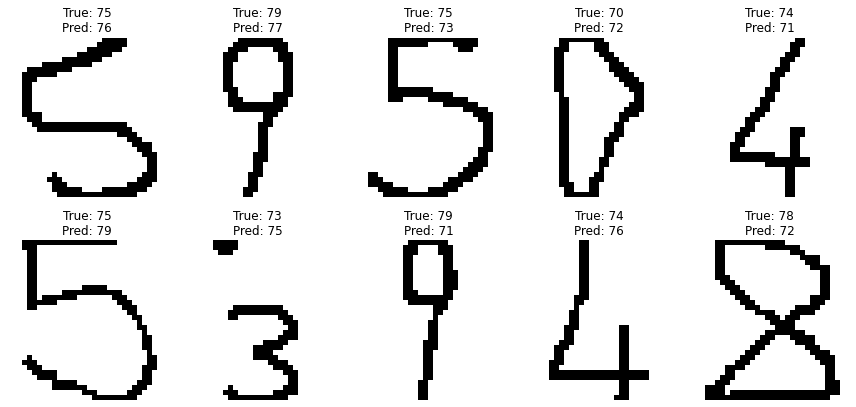

In [55]:
# # Step 1: Find misclassified indices
# misclassified_idx = np.where(y_test != y_pred)[0]
# print(f"Number of misclassified images: {len(misclassified_idx)}")

# # Step 2: Plot some misclassified images (up to 10)
# plt.figure(figsize=(12, 6))
# for i, idx in enumerate(misclassified_idx[:10]):
#     img = X_test[idx].reshape(32, 32)  # Reshape flattened vector to 32x32
#     true_label = y_test[idx]
#     predicted_label = y_pred[idx]
    
#     plt.subplot(2, 5, i + 1)
#     plt.imshow(img, cmap='gray')
#     plt.title(f"True: {true_label}\nPred: {predicted_label}")
#     plt.axis('off')

# plt.tight_layout()
# plt.show()


In [60]:
# Step 1: Find misclassified indices
misclassified_idx = np.where(y_test != y_pred)[0]
print(f"Number of misclassified images: {len(misclassified_idx)}")

# Step 2: Plot some misclassified images (up to 10)
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_idx[:10]):
    img = X_test[idx].reshape(32, 32)  # Reshape flattened vector to 32x32
    true_label = y_test[idx]
    predicted_label = y_pred[idx]
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Number of misclassified images: 0


<Figure size 864x432 with 0 Axes>

Here are some examples of the syntax used to fit a logistic regression classifier (using Sklearn or statsmodel with Python, or GLM with R):

In [ ]:
#Sklearn (python)

#from sklearn.linear_model import LogisticRegression

#Fit on the training data set, with:
#X : {array-like, sparse matrix}, shape (n_samples, n_features) , n_samples rows x n_features columns
#with attributes that describe each sample.
#y : array-like, shape (n_samples,) , n_samples target values for each sample.

#model = LogisticRegression()
#model.fit(X, y)

**Remember to submit your code on the MOOC platform. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**